In [ ]:
# Fold
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 256, 256
train_data_dir = "data/train"
validation_data_dir = "data/val"
nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 16
epochs = 50

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 1))

"""
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv4 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 32, 32, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 32, 32, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv4 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 16, 16, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 8, 8, 512)         0         
=================================================================
Total params: 20,024,384.0
Trainable params: 20,024,384.0
Non-trainable params: 0.0
"""

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])



dataSpecs =  {'classLength': [14]}
dataSpecs =  {'classLength': [14, 12]}
dataSpecs =  [14, 12]
12
(23, 385, 385, 3)
(3, 385, 385, 3)


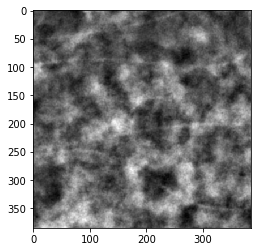

In [79]:
import cv2
import glob
import matplotlib.pyplot as plt
import math

def get_images(path, dataSpecs):
    fileList = glob.glob(path) #'BengaliBMPConvert/*.bmp'   
    num = len(fileList)
    dataSpecs['classLength'].append(len(fileList))
    print('dataSpecs = ', dataSpecs)
    x = np.array([(cv2.imread(fname)) for fname in fileList])
    return x

def get_labels_one_hot(num_classes, class_id, num_samples):
    x = np.zeros((num_samples, num_classes))
    x[np.arange(num_samples),class_id] = 1
    return x
 
    
    
def main():
    # Get images and labels
    data = {'img': 0, 'label': 0}
    dataSpecs = {'classLength': []}
    dataSpecs['classLength'] = []
    #img_bg = get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/0/*')
    #img_calc = get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/1/*')
    data['img'] = np.concatenate((
        get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/0/*', dataSpecs), # Class 0
        get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/1/*', dataSpecs) # Class 1
    ))  
    print('dataSpecs = ', dataSpecs['classLength'])
    print(dataSpecs['classLength'][1])
    labels_bg = get_labels_one_hot(2, 0, dataSpecs['classLength'][0])  
    labels_calc = get_labels_one_hot(2, 1, dataSpecs['classLength'][1])
    data['label'] = np.concatenate((
        get_labels_one_hot(2, 0, dataSpecs['classLength'][0]), # Class 0 
        get_labels_one_hot(2, 1, dataSpecs['classLength'][1]) # Class 1
    ))

    # Shuffle data
    seed = 33
    np.random.seed(seed) # Has to be set before each use of random
    shuffleMask = np.random.permutation(data['img'].shape[0])    
    data['img'] = data['img'][shuffleMask, :, :, :]
    data['label'] = data['label'][shuffleMask, :]
    
    # Split traing and validation data        
    splitRatio = 0.9
    splitPoint = math.floor(data['img'].shape[0]*splitRatio)
    train_data = {'img': data['img'][0:splitPoint], 'label': data['label'[0:splitPoint]]}
    validation_data = {'img': data['img'][splitPoint:], 'label': data['label'][splitPoint:]}
    print(train_data['img'].shape)
    print(validation_data['img'].shape)
    
    # Print image    
    img_calc = train_data['img']/255    
    plt.imshow(img_calc[0], cmap='gray')
    plt.show()
    
if __name__ == "__main__":
    main()

In [18]:
a = np.array([np.arange(9) for i in range(3)])
a = a + 2
print(a)
print(a.shape)
print('__')
b = np.random.permutation(a.shape[1])
print(b)
print(a[1,b])
print('\n\n')
np.random.seed(10)  # Has to be set before each use of random
a = a[:, np.random.permutation(a.shape[1])]
print(a)


[[ 2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10]]
(3, 9)
__
[3 7 4 6 8 2 1 5 0]
[ 5  9  6  8 10  4  3  7  2]



[[10  4  7  8  5  3  2  9  6]
 [10  4  7  8  5  3  2  9  6]
 [10  4  7  8  5  3  2  9  6]]


In [15]:
print('hello world')

hello world


In [39]:
# Mutable objects such as lists act as call by reference
# Unmutable objects such as integers, strings act as call by value

def test (f):
    f[0] = 2
x = [1, 2, 3]
test(x)
print(x)

[2, 2, 3]


In [64]:

def myFunc (x):
    x = x+[99]
    print(x, '\n')
def alterDict(x):
    x['test'] = [9,9,9]
def alterList(x):
    x = x + [7]
    
myDict = {'test': [1,2,3]}
print(myDict)
myFunc(myDict['test'])

print(myDict)
alterDict(myDict)
print(myDict)

y = [1,2,3]
alterList(y)
print('\n',y)


{'test': [1, 2, 3]}
[1, 2, 3, 99] 

{'test': [1, 2, 3]}
{'test': [9, 9, 9]}

 [1, 2, 3]
